In [1]:
%matplotlib inline
from kde import kde, akde
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rc('figure', figsize=(10, 7))
mpl.rc('image', cmap='gray')
mpl.rc('font', size=16)

# Kernel Density Estimation with kde.py #
A ***Kernel Density Estimator*** (KDE) is used to estimate the continuous probability
distribution, $\rho(\mathbf{x})$, from which a set of discrete measurements, 
$\{\mathbf{x}_j\}$, is drawn. Each discrete
sample of the distribution contributes to the estimate for the part of the 
distribution that lies in its vicinity. Given a set of $N$ discrete samples, 
the estimate for $\rho(\mathbf{y})$ at point $\mathbf{y}$ is
$$\tilde{\rho}(\mathbf{y}) = \frac{1}{N} \sum_{j=1}^N \frac{1}{h} K\left(\frac{\mathbf{y} - \mathbf{x}_j}{h}\right).$$
How the $j$-th sample contributes is determined
by the choice of **kernel**, $K(\cdot)$. The range over which it contributes depends on the
choice of **bandwidth**, $h$. In practice, the
functional form of the kernel should not substantially affect the estimate, and
any normalized function with a central peak should serve well.
The Gaussian kernel is a common choice.
The bandwidth generally is computed from the density of samples, with higher-density
samples requiring smaller bandwidths.
The optimal bandwidth yields a smooth distribution function
without unduly broadening or washing out peaks.

An ***Adaptive Kernel Density Estimator*** (AKDE) varies the bandwidth based on the local density
of samples ($h \to h_j$), with higher-density regions receiving smaller bandwidths. Varying the
bandwidth is intended to capture finer details of the distribution in regions with
larger numbers of samples, while better smoothing the low-probability tails.
This can be useful for multimodal distributions, but requires substantially more
computation and can be slow for large data sets.

**Reference**: Bernard W. Silverman, *Density Estimation for Statistics and Data Analysis*
(Routledge, 2018)

**Example 1**: Using discrete samples to estimate a continuous
probability density in one dimension

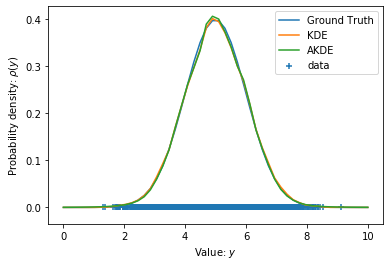

In [2]:
# 1. Generate a set of discrete samples drawn from a Gaussian probability distribution
nsamples = 10000  # number of discrete samples
mu = 5.           # mean
sigma = 1.        # variance
x = np.random.normal(loc=mu, scale=sigma, size=nsamples)
# Plot samples as discrete points along the x axis
plt.scatter(x, 0.*x, marker='+', label='data')

# 2. Values at which to estimate the continuous distribution function.
y = np.linspace(0, 10)

# 3. Plot the ground truth probability distribution for comparison with estimates
z = (y - mu)**2 / (2. * sigma**2)
norm = np.sqrt(2.*np.pi*sigma**2)
rho = np.exp(-z) / norm
plt.plot(y, rho, label='Ground Truth')

# 4. Perform and plot kernel density estimate with optimal fixed bandwidth
rho1 = kde(x, y)
plt.plot(y, rho1, label='KDE')

# 5. Perform and plot adaptive kernel density estimate
rho2 = akde(x, y)
plt.plot(y, rho2, label='AKDE')

# 6. Label the plot!!!
plt.xlabel(r'Value: $y$')
plt.ylabel(r'Probability density: $\rho(y)$')
plt.legend()

**Example 2**: Coloring a two-dimensional scatter plot by the joint probability density of measurements

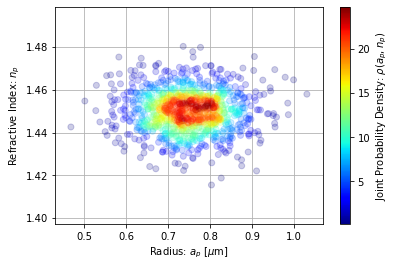

In [4]:
# 1. Generate a set of points distributed in the plane
#    according to a Gaussian distribution.
#    To mimic holographic particle characterization measurements,
#    the two variables are the radius of the particle, a_p, in micrometers
#    and the refractive index of the particle, n_p.
npts = 1000
a_p = np.random.normal(loc=0.75, scale=0.08, size=npts)
n_p = np.random.normal(loc=1.45, scale=0.01, size=npts)
x = [a_p, n_p]

# 2. Estimate the density of measurements around each point by
#    computing the adaptive kernel density estimate.
rho = akde(x, x)

# 3. Plot the points colored by the local density of measurements.
sp = plt.scatter(a_p, n_p, c=rho, alpha=0.2, cmap='jet', zorder=5)

# 4. Label the plot!!!
plt.xlabel(r'Radius: $a_p$ [$\mu$m]')
plt.ylabel(r'Refractive Index: $n_p$')
plt.grid(zorder=10)

# 5. Add a color bar to explain the colors
cb = plt.colorbar(sp)
cb.solids.set(alpha=1) # saturated colors in colorbar
cb.set_label(r'Joint Probability Density: $\rho(a_p, n_p)$')